# Derivatives and partial derivatives

In [62]:
import torch
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


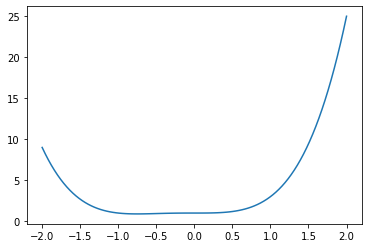

In [11]:
x = np.linspace(-2, 2, 100)
y = x**4 + x**3 + 1
plt.plot(x, y)

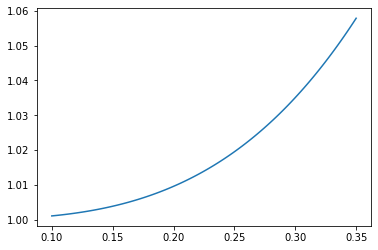

In [13]:
x = np.linspace(.1, .35, 100)
y = x**4 + x**3 + 1
plt.plot(x, y)

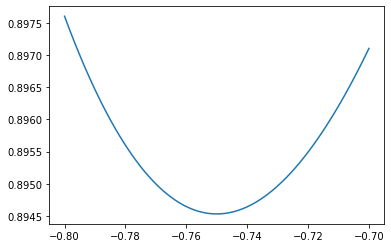

In [14]:
x = np.linspace(-.8, -.7, 100)
y = x**4 + x**3 + 1
plt.plot(x, y)

In [6]:
x = torch.tensor([-5], dtype=torch.float, requires_grad=True)
y = x ** 4 + x ** 3 + 1
y.backward()
x.grad.item()

-425.0

In [4]:
4 * (-5) ** 3 + 3 * (-5) ** 2

-425

## Clip gradient
#### Normilizing vector of gradient (the length of vector must be equal to 1)

In [67]:
grad_len = torch.norm(torch.tensor([1., 2.]))

In [68]:
torch.tensor([1., 2.]) / grad_len

tensor([0.4472, 0.8944])

#### $ f(x) = x^4 + x^3 + 1 $

In [70]:
def clip_gradient(gradient: torch.Tensor, max_length: float) -> torch.Tensor:
    norm = torch.norm(gradient)   # norm = length of the gradient's vector
    if norm < max_length:
        return gradient
    return (gradient / norm) * max_length


def gradient_descent(f, x0, alpha=0.01, step=1, clip_grad_length=1., N_steps=10001) -> torch.float:
    for _ in range(N_steps):
        x = torch.tensor([x0], dtype=torch.float, requires_grad=True)
        y = f(x)   # x ** 4 + x ** 3 + 1
        y.backward()
        clipped_grad = clip_gradient(x.grad, clip_grad_length)
        x0 -= clipped_grad.item() * alpha * step
    return x0



f = lambda x: x**4 + x**3 + 1
fxLocMins = []

for x0 in [-5, -20, -100, 1, -10, .1]:
    xMin = gradient_descent(f, x0)
    fMin = f(xMin)
    fxLocMins.append((xMin, fMin))
    print(x0, xMin, fMin)
fxGlobMin = min(fxLocMins, key=lambda x: x[1])
print('\n\nGlobal minimum of function:', f'x = {fxGlobMin[0]}, y = {fxGlobMin[1]}')

-5 -0.7500000286102945 0.8945312500000009
-20 -0.7500000298019981 0.894531250000001
-100 -0.7650739383555019 0.8947937785099187
1 0.0032604477966008574 1.000000034773263
-10 -0.750000028610401 0.8945312500000009
0.1 0.003178919939619094 1.000000032226799


Global minimum of function: x = -0.7500000286102945, y = 0.8945312500000009


## $ f(x) = x^2 + y^2 $

In [18]:
u = torch.tensor([1,2], dtype=torch.float, requires_grad=True)
f = u[0] ** 2 + u[1] ** 2
f.backward()
u.grad

tensor([2., 4.])

In [20]:
alpha = .001
step = 1
x0 = np.array([1,2], dtype=np.float)
for i in range(10001):
    x = torch.tensor(x0, dtype=torch.float, requires_grad=True)
    y = x[0] ** 2 + x[1] ** 2
    y.backward()
    x0 -= (x.grad.detach().numpy() * alpha) * step

x0

array([2.01624359e-09, 4.03248718e-09])

## $ f(x) = 5x^4 + 3x^3 + 7x^2 + 9x - 5 $

In [8]:
x = torch.autograd.Variable(torch.Tensor([2]), requires_grad=True)
y = 5*x**4 + 3*x**3 + 7*x**2 + 9*x - 5
y.backward()
x.grad

tensor([233.])

## Useful links:

- [Auto-finding gradients in PyTorch](https://pytorch.org/tutorials/beginner/former_torchies/autograd_tutorial_old.html?highlight=autograd)
- [WSL installing](https://docs.microsoft.com/ru-ru/windows/wsl/install-win10)